In [1]:
import sys
sys.path.insert(0, '../python/lib/')
import ons
import utl
import pandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 8)
api_key = <your api key here>

In [2]:
%%capture
datasets= ons.get_datasets_for_context('Social',api_key)
datasets.head()

,name,geography,differentiator,file_url,publication_date
0,Small Area Population Estimates,2011 Statistical Geography Hierarchy,2011,http://data.statistics.gov.uk/ons/datasets/csv...,2015-04-02+01:00
1,Small Area Population Estimates,2011 Statistical Geography Hierarchy,2012,http://data.statistics.gov.uk/ons/datasets/csv...,2015-04-02+01:00
2,Small Area Population Estimates,2011 Statistical Geography Hierarchy,2010,http://data.statistics.gov.uk/ons/datasets/csv...,2015-04-02+01:00
3,Small Area Population Estimates,2011 Statistical Geography Hierarchy,2005,http://data.statistics.gov.uk/ons/datasets/csv...,2015-04-02+01:00
4,Small Area Population Estimates,2011 Statistical Geography Hierarchy,2004,http://data.statistics.gov.uk/ons/datasets/csv...,2015-04-02+01:00


Get population estimates by health area from the 2012 data

In [8]:
url = datasets[(datasets['name'] == 'Small Area Population Estimates') 
               & (datasets['differentiator']==2012) 
               & (datasets['geography']=='2013 Health Area Hierarchy')]['file_url'].values[0]
data = utl.get_csv_data_from_url(url)


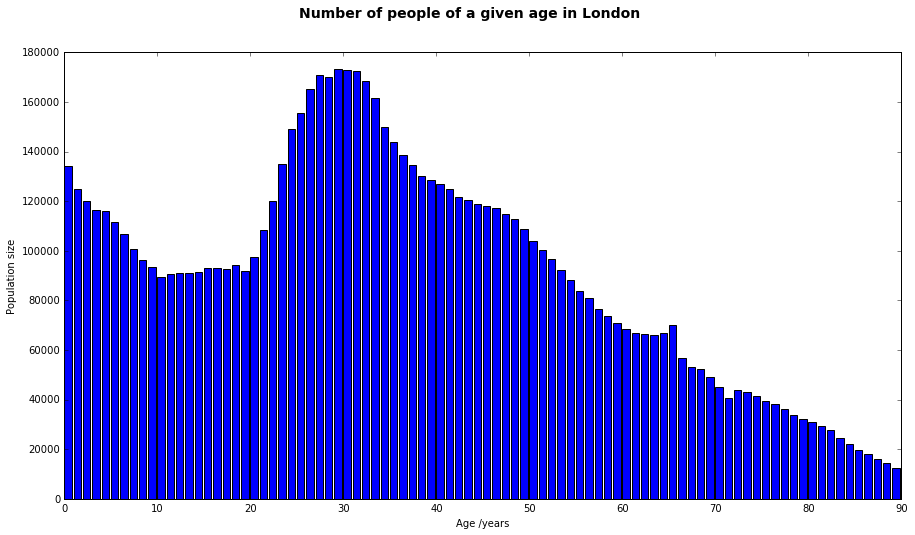

In [12]:
london_data = data[data['Geographic Area']=='London'].iloc[0]
transposed_data = pandas.concat([pandas.DataFrame({ 'Count' : [int(london_data[str(x)]['Total: All Persons'])],'Age':x})
               for x in range(90)],axis =0)
fig = plt.figure()
fig.suptitle('Number of people of a given age in London', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Age /years')
ax.set_ylabel('Population size')
plt.bar(transposed_data['Age'],transposed_data['Count']);

Looks like people have children and leave london, sounds plausible but is it really this smooth?